In [1]:
import os
from collections import defaultdict
import logging
from IPython.display import HTML, display
import math
from itertools import islice, product
from enum import Enum
from PIL import Image

In [2]:
# tilesets; DICT[str, Tileset]
%run ./CEL\ INSPECTOR.ipynb

In [3]:
def chunk(it, size):
    it = iter(it)
    return list(iter(lambda: tuple(islice(it, size)), ()))


def format_word(v, w):
    text = '{:02X} {:02X}'.format(v, w)
    return f'{text}'


def byte_to_char(b):
    try:
        if b >= 32 and b <= 126:
            return bytes([b]).decode('utf-8')
        else:
            return '.'
    except:
        return '.'

    
def hex_view(data):
    text = []
    text.append(
        14 * '&nbsp;' +
        '&nbsp;'.join(['{:02X}'.format(y) for y in range(8)]) +
        '&nbsp;&nbsp;' +
        '&nbsp;'.join(['{:02X}'.format(y) for y in range(8, 16)]) +
        '&nbsp;&nbsp;' +
        'text'
    )
    text.append('')
    for i, x in enumerate(chunk(data, 16)):
        text.append('{:08X}:&nbsp;&nbsp;&nbsp;&nbsp;'.format(i * 16) +
            '&nbsp;'.join([format_word(y, z) for y, z in zip(x[:8:2], x[1:8:2])]) +
            '&nbsp;&nbsp;' +
            '&nbsp;'.join([format_word(y, z) for y, z in zip(x[8:16:2], x[9:16:2])]) +
            '&nbsp;&nbsp;' +
            '&nbsp;'.join([byte_to_char(y) for y in x[:8]]) +
            '&nbsp;' +
            '&nbsp;'.join([byte_to_char(y) for y in x[8:16]])
        )
    return '<span style="font-family: Courier New, Courier, Lucida Sans Typewriter, Lucida Typewriter, monospace;">{}</span>'.format("<br>".join(text))


def display_hex_view(data):
    display(HTML(hex_view(data)))


#display_hex_view(bytes(range(132)))

In [4]:
from collections import namedtuple 


File = namedtuple('File', ['name', 'offset', 'length'])
FOLDER = '/home/alex/.wine/drive_c/GOG Games/WH40K Final Liberation'


# a muk looks to be a bit like a tar file, to group files up
def read_muk():
    with open(f'{FOLDER}/BDG.MUK', 'rb') as file:
        header = file.read(34)
        #display_hex_view(header)
        _ = file.read(4)
        unknown1 = int.from_bytes(file.read(2), 'little')
        packaged_files = int.from_bytes(file.read(2), 'little')
        unknown2 = int.from_bytes(file.read(2), 'little')
        unknown3 = int.from_bytes(file.read(2), 'little')
        unknown4 = file.read(10)
        #print(packaged_files, unknown2, unknown3, unknown4)

        # next block contains filenames, offests and their lengths in the final block
        files = []
        for i in range(packaged_files):
            filename = file.read(11).decode('utf-8')
            blank = file.read(2) # maybe double blank is the terminator?
            file_offset = int.from_bytes(file.read(4), 'little')
            file_length = int.from_bytes(file.read(4), 'little')
            files.append(File(filename, file_offset, file_length))

        # use the preceeding info to jump around the file, to read the files tared up
        for f in files:
            file.seek(f.offset)
            print(f.name, f.offset, f.length)
            read_virtual_file(file, f.name, f.length)
        pos, size = file.tell(), os.fstat(file.fileno()).st_size
        assert pos == size , f"Did not read to EOF {pos} of {size}"

A_HOLE1.BDG 10997 72


[43, 28, 1, 335, 0, 256, 0, 18, 29, 1, -14, -2, 0, 0, 0, 255]

[TileImage(x=43, y=28, z=1, page=335, index=0)]
[TileData(unknown=0, width=18, height=29, tile_count=1, x=-14, y=-2)]
[TileInfo(x=0, y=0, terrain_type=0)]



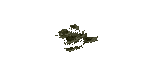

A_HOLE2.BDG 11069 72


[31, 14, 1, 335, 1, 256, 0, 14, 22, 1, -18, -9, 0, 0, 0, 255]

[TileImage(x=31, y=14, z=1, page=335, index=1)]
[TileData(unknown=0, width=14, height=22, tile_count=1, x=-18, y=-9)]
[TileInfo(x=0, y=0, terrain_type=0)]



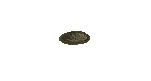

A_HOLE3.BDG 11141 72


[78, 47, 1, 335, 2, 256, 0, 39, 36, 1, 7, 5, 0, 0, 0, 255]

[TileImage(x=78, y=47, z=1, page=335, index=2)]
[TileData(unknown=0, width=39, height=36, tile_count=1, x=7, y=5)]
[TileInfo(x=0, y=0, terrain_type=0)]



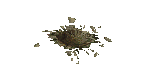

A_HOLE4.BDG 11213 136


[152, 82, 1, 335, 3, 256, 0, 73, 53, 9, 41, 22, 0, 0, 0, 255, 1, 0, 0, 255, 1, -1, 0, 255, -1, -1, 0, 255, -1, 0, 0, 255, 0, 1, 0, 255, 0, -1, 0, 255, -2, 0, 0, 255, 2, 0, 0, 255]

[TileImage(x=152, y=82, z=1, page=335, index=3)]
[TileData(unknown=0, width=73, height=53, tile_count=9, x=41, y=22)]
[TileInfo(x=0, y=0, terrain_type=0), TileInfo(x=1, y=0, terrain_type=0), TileInfo(x=1, y=-1, terrain_type=0), TileInfo(x=-1, y=-1, terrain_type=0), TileInfo(x=-1, y=0, terrain_type=0), TileInfo(x=0, y=1, terrain_type=0), TileInfo(x=0, y=-1, terrain_type=0), TileInfo(x=-2, y=0, terrain_type=0), TileInfo(x=2, y=0, terrain_type=0)]



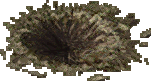

a_treea0.BD 11349 84


[63, 119, 2, 334, 0, 259, 0, 28, 114, 334, 12, 256, 4, 28, 114, 1, -4, 99, 0, 0, 7, 255]

[TileImage(x=63, y=119, z=2, page=334, index=0), TileImage(x=0, y=28, z=114, page=334, index=12)]
[TileData(unknown=4, width=28, height=114, tile_count=1, x=-4, y=99)]
[TileInfo(x=0, y=0, terrain_type=7)]



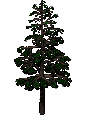

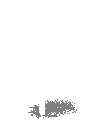

A_TREEA1.BD 11433 72


[69, 27, 1, 334, 5, 256, 0, 36, 26, 1, 4, 7, 0, 0, 0, 255]

[TileImage(x=69, y=27, z=1, page=334, index=5)]
[TileData(unknown=0, width=36, height=26, tile_count=1, x=4, y=7)]
[TileInfo(x=0, y=0, terrain_type=0)]



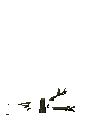

a_treeb0.BD 11505 84


[65, 119, 2, 334, 12, 256, 4, 30, 114, 334, 0, -253, 4, 30, 114, 1, -2, 99, 0, 0, 7, 255]

[TileImage(x=65, y=119, z=2, page=334, index=12), TileImage(x=4, y=30, z=114, page=334, index=0)]
[TileData(unknown=4, width=30, height=114, tile_count=1, x=-2, y=99)]
[TileInfo(x=0, y=0, terrain_type=7)]



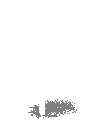

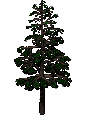

A_TREEb1.BD 11589 72


[75, 19, 1, 334, 11, 256, 2, 37, 13, 1, 5, -2, 0, 0, 0, 255]

[TileImage(x=75, y=19, z=1, page=334, index=11)]
[TileData(unknown=2, width=37, height=13, tile_count=1, x=5, y=-2)]
[TileInfo(x=0, y=0, terrain_type=0)]



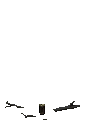

a_treec0.BD 11661 84


[75, 90, 2, 334, 13, 256, 4, 34, 87, 334, 1, 259, 4, 34, 87, 1, 2, 72, 0, 0, 5, 255]

[TileImage(x=75, y=90, z=2, page=334, index=13), TileImage(x=4, y=34, z=87, page=334, index=1)]
[TileData(unknown=4, width=34, height=87, tile_count=1, x=2, y=72)]
[TileInfo(x=0, y=0, terrain_type=5)]



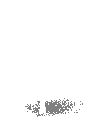

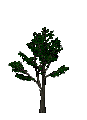

a_treec1.bd 11745 72


[69, 27, 1, 334, 5, 256, 0, 36, 26, 1, 4, 7, 0, 0, 0, 255]

[TileImage(x=69, y=27, z=1, page=334, index=5)]
[TileData(unknown=0, width=36, height=26, tile_count=1, x=4, y=7)]
[TileInfo(x=0, y=0, terrain_type=0)]



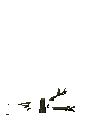

a_treed0.BD 11817 84


[82, 93, 2, 334, 2, 259, 4, 42, 86, 334, 14, 256, 6, 42, 86, 1, 10, 71, 0, 0, 5, 255]

[TileImage(x=82, y=93, z=2, page=334, index=2), TileImage(x=4, y=42, z=86, page=334, index=14)]
[TileData(unknown=6, width=42, height=86, tile_count=1, x=10, y=71)]
[TileInfo(x=0, y=0, terrain_type=5)]



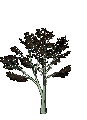

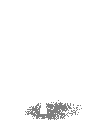

a_treed1.bd 11901 72


[75, 19, 1, 334, 11, 256, 2, 37, 13, 1, 5, -2, 0, 0, 0, 255]

[TileImage(x=75, y=19, z=1, page=334, index=11)]
[TileData(unknown=2, width=37, height=13, tile_count=1, x=5, y=-2)]
[TileInfo(x=0, y=0, terrain_type=0)]



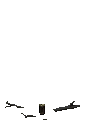

a_treee0.BD 11973 84


[72, 81, 2, 334, 15, 256, 4, 26, 76, 334, 3, 259, 4, 26, 76, 1, -6, 61, 0, 0, 5, 255]

[TileImage(x=72, y=81, z=2, page=334, index=15), TileImage(x=4, y=26, z=76, page=334, index=3)]
[TileData(unknown=4, width=26, height=76, tile_count=1, x=-6, y=61)]
[TileInfo(x=0, y=0, terrain_type=5)]



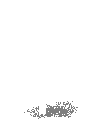

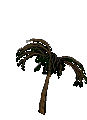

a_treee1.bd 12057 72


[69, 27, 1, 334, 5, 256, 0, 36, 26, 1, 4, 7, 0, 0, 0, 255]

[TileImage(x=69, y=27, z=1, page=334, index=5)]
[TileData(unknown=0, width=36, height=26, tile_count=1, x=4, y=7)]
[TileInfo(x=0, y=0, terrain_type=0)]



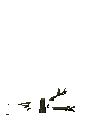

A_TREEf0.BD 12129 84


[63, 59, 2, 334, 16, 256, 4, 30, 55, 334, 4, 259, 4, 30, 55, 1, -2, 40, 0, 0, 3, 255]

[TileImage(x=63, y=59, z=2, page=334, index=16), TileImage(x=4, y=30, z=55, page=334, index=4)]
[TileData(unknown=4, width=30, height=55, tile_count=1, x=-2, y=40)]
[TileInfo(x=0, y=0, terrain_type=3)]



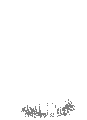

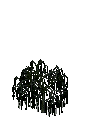

a_treef1.bd 12213 72


[75, 19, 1, 334, 11, 256, 2, 37, 13, 1, 5, -2, 0, 0, 0, 255]

[TileImage(x=75, y=19, z=1, page=334, index=11)]
[TileData(unknown=2, width=37, height=13, tile_count=1, x=5, y=-2)]
[TileInfo(x=0, y=0, terrain_type=0)]



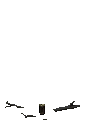

A_TREEg0.BD 12285 84


[59, 96, 2, 334, 6, 259, 0, 26, 92, 334, 16, 256, 4, 26, 92, 1, -6, 77, 0, 0, 6, 255]

[TileImage(x=59, y=96, z=2, page=334, index=6), TileImage(x=0, y=26, z=92, page=334, index=16)]
[TileData(unknown=4, width=26, height=92, tile_count=1, x=-6, y=77)]
[TileInfo(x=0, y=0, terrain_type=6)]



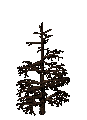

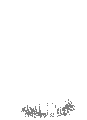

a_treeg1.bd 12369 72


[69, 27, 1, 334, 5, 256, 0, 36, 26, 1, 4, 7, 0, 0, 0, 255]

[TileImage(x=69, y=27, z=1, page=334, index=5)]
[TileData(unknown=0, width=36, height=26, tile_count=1, x=4, y=7)]
[TileInfo(x=0, y=0, terrain_type=0)]



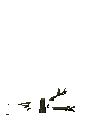

A_TREEh0.BD 12441 84


[59, 91, 2, 334, 19, 256, 4, 29, 84, 334, 7, 259, 4, 29, 84, 1, -3, 69, 0, 0, 5, 255]

[TileImage(x=59, y=91, z=2, page=334, index=19), TileImage(x=4, y=29, z=84, page=334, index=7)]
[TileData(unknown=4, width=29, height=84, tile_count=1, x=-3, y=69)]
[TileInfo(x=0, y=0, terrain_type=5)]



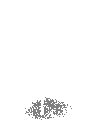

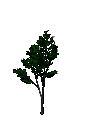

a_treeh1.bd 12525 72


[75, 19, 1, 334, 11, 256, 2, 37, 13, 1, 5, -2, 0, 0, 0, 255]

[TileImage(x=75, y=19, z=1, page=334, index=11)]
[TileData(unknown=2, width=37, height=13, tile_count=1, x=5, y=-2)]
[TileInfo(x=0, y=0, terrain_type=0)]



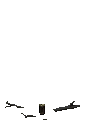

A_TREEi0.BD 12597 84


[30, 32, 2, 334, 20, 256, 4, 14, 30, 334, 8, 259, 4, 14, 30, 1, -18, 15, 0, 0, 2, 255]

[TileImage(x=30, y=32, z=2, page=334, index=20), TileImage(x=4, y=14, z=30, page=334, index=8)]
[TileData(unknown=4, width=14, height=30, tile_count=1, x=-18, y=15)]
[TileInfo(x=0, y=0, terrain_type=2)]



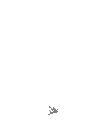

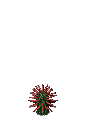

a_treei1.bd 12681 72


[69, 27, 1, 334, 5, 256, 0, 36, 26, 1, 4, 7, 0, 0, 0, 255]

[TileImage(x=69, y=27, z=1, page=334, index=5)]
[TileData(unknown=0, width=36, height=26, tile_count=1, x=4, y=7)]
[TileInfo(x=0, y=0, terrain_type=0)]



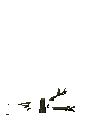

A_TREEj0.BD 12753 84


[67, 86, 2, 334, 9, 259, 4, 26, 79, 334, 21, 256, 6, 26, 79, 1, -6, 64, 0, 0, 5, 255]

[TileImage(x=67, y=86, z=2, page=334, index=9), TileImage(x=4, y=26, z=79, page=334, index=21)]
[TileData(unknown=6, width=26, height=79, tile_count=1, x=-6, y=64)]
[TileInfo(x=0, y=0, terrain_type=5)]



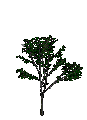

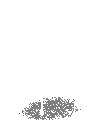

a_treej1.bd 12837 72


[75, 19, 1, 334, 11, 256, 2, 37, 13, 1, 5, -2, 0, 0, 0, 255]

[TileImage(x=75, y=19, z=1, page=334, index=11)]
[TileData(unknown=2, width=37, height=13, tile_count=1, x=5, y=-2)]
[TileInfo(x=0, y=0, terrain_type=0)]



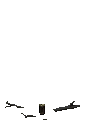

A_TREEk0.BD 12909 84


[55, 56, 2, 334, 22, 256, 2, 29, 53, 334, 10, 259, 6, 29, 53, 1, -3, 38, 0, 0, 3, 255]

[TileImage(x=55, y=56, z=2, page=334, index=22), TileImage(x=2, y=29, z=53, page=334, index=10)]
[TileData(unknown=6, width=29, height=53, tile_count=1, x=-3, y=38)]
[TileInfo(x=0, y=0, terrain_type=3)]



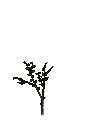

a_treek1.bd 12993 72


[69, 27, 1, 334, 5, 256, 0, 36, 26, 1, 4, 7, 0, 0, 0, 255]

[TileImage(x=69, y=27, z=1, page=334, index=5)]
[TileData(unknown=0, width=36, height=26, tile_count=1, x=4, y=7)]
[TileInfo(x=0, y=0, terrain_type=0)]



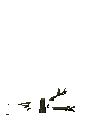

AA.BDG      13065 268


[192, 133, 12, 2, 13, 256, 32, 160, 69, 2, 9, -256, 32, 32, 69, 2, 8, -256, 64, 96, 37, 2, 3, -255, 0, 32, 101, 2, 3, 258, 0, 160, 101, 2, 12, 256, 32, 128, 85, 2, 10, -256, 32, 64, 85, 2, 11, 256, 16, 96, 101, 2, 5, -255, 0, 64, 117, 2, 3, 258, 0, 128, 117, 2, 3, -255, 0, 96, 133, 2, 3, 258, 0, 96, 133, 9, 64, 70, 0, 1, 2, 255, 0, 0, 4, 255, 0, -1, 2, 255, -1, -1, 2, 255, -2, 0, 2, 255, -1, 0, 2, 255, 1, 0, 2, 255, 2, 0, 2, 255, 1, -1, 2, 255]

[TileImage(x=192, y=133, z=12, page=2, index=13), TileImage(x=32, y=160, z=69, page=2, index=9), TileImage(x=32, y=32, z=69, page=2, index=8), TileImage(x=64, y=96, z=37, page=2, index=3), TileImage(x=0, y=32, z=101, page=2, index=3), TileImage(x=0, y=160, z=101, page=2, index=12), TileImage(x=32, y=128, z=85, page=2, index=10), TileImage(x=32, y=64, z=85, page=2, index=11), TileImage(x=16, y=96, z=101, page=2, index=5), TileImage(x=0, y=64, z=117, page=2, index=3), TileImage(x=0, y=128, z=117, page=2, index=3), TileImage(x=0, y=96, z=133, page

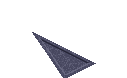

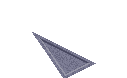

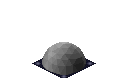

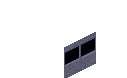

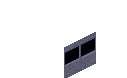

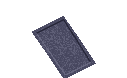

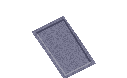

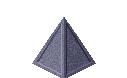

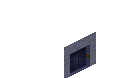

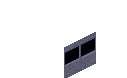

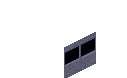

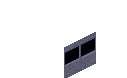

AA_____0.BD 13333 268


IndexError: list index out of range

In [10]:
from itertools import zip_longest


TileImage = namedtuple('TileImage', ['x', 'y', 'z', 'page', 'index'])
TileData = namedtuple('TileData', ['unknown', 'width', 'height', 'tile_count', 'x', 'y'])
TileInfo = namedtuple('TileInfo', ['x', 'y', 'terrain_type'])


def read_virtual_file(file, filepath, length):
    pos = file.tell()
    header = file.read(40).decode('utf-8')
    display_hex_view(file.read(length-40))
    file.seek(pos)
    header = file.read(39).decode('utf-8')
    assert int.from_bytes(file.read(1), 'little') == 26
    data = [
        int.from_bytes(file.read(2), 'little', signed=True) 
        for i in range((length - 40) // 2)
    ]
    cels = []
    tile_data = []
    tiles = []
    i = 0
    run_length = 5 # first block is an image
    while i < len(data):
        run = data[i:i+run_length]
        if run_length == 5:
            cels.append(TileImage(*run))
        elif len(run) == 3:
            tiles.append(TileInfo(*run))
        elif len(run) == 9:
            tile_data.append(TileData(*run[0:6]))
            tiles.append(TileInfo(*run[6:9]))
        else:
            logging.warning(f"run length is {len(run)}")
        run = []
    
    assert tile_data[0].tile_count == len(tiles)
    print(data)
    print()
    print(cels)
    print(tile_data)
    print(tiles)
    print()
    for x in cels:
        try:
            Sprite(f'PAGE{x.page:04}.CEL').display_image(x.index)
        except:
            logging.warning(f"Could not display {x.page} index {x.index}")


read_muk()

In [ ]:
# end blocks

# 256 = DATA block: u1 width height tiles u2 u3
# 259 = CEL block (first):  x, y, z, page, index
# 255 = tile state: x y tile_type

# start blocks

# 256 data block
# 258 data block
# 259 cell block
# 255/143/136/227/224 terminates tile state

In [ ]:
# if word is greater than 256 or 259 terminates a run? there is another CEL image:
# x, y, z, page, index
# a block of 9 numbers
# 255 followed by x, y, terrain_type?

In [ ]:
# capital case and 1 indicate destroyed versions of the lowercase and 0
# 4th WORD is the cell page for the building